# Analysis of M1 Expert Pies
<t>By: Avinash Bisram</t>

<t><b>Analysis Questions:</b><br> 
    How does changing the retirement year and/or the risk of the investments affect the...</t>
<ol>
    <li>Relative percentage allocated to each type of security (cash, stocks, bond, commodity/blend)?</li>
    <li>Allocation of the different caps?</li>
    <li>Preference of value vs. growth funds?</li>
    <li>Preference of fund location (US, international, or all)?</li>
    <li>Top 3 individual fund preferences?</li>
    <li>Bottom 3 individual fund preferences?</li>
    <li>Annual dividend yields?</li>
    <li>Historic 1-year, 3-year, and 5-year returns?</li>
</ol>
</t>

<b>0.0.1 Importing necessary libraries</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>0.0.2 Reading in the data</b>

In [2]:
raw = pd.read_csv("m1_pies.csv") #Data as of 7/10/21

## 1.0 Initial Data Exploration

<b>1.0.1 Head of Dataset</b>

In [3]:
raw.head() # First 5 rows

,Retire_Year,Risk_Type,Holdings,Expenses,Dividend_Yield,Risk_Level,Return_1Y,Return_3Y,Return_5Y,BIL,...,VOE,VOO,VOT,VTV,VUG,VWO,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,2020,Aggressive,19,0.08,2.07,Medium low,26.64,42.48,73.04,2.0,...,4,8,3,9,7,5,NaN,NaN,NaN,NaN
1,2020,Conservative,19,0.09,2.52,Medium low,13.13,32.51,45.37,3.0,...,2,4,2,4,3,2,NaN,NaN,NaN,NaN
2,2020,Moderate,19,0.09,2.33,Medium low,19.73,37.51,58.01,3.0,...,3,6,2,7,5,3,NaN,NaN,NaN,NaN
3,2025,Aggressive,19,0.08,2.06,Medium,30.17,44.32,79.63,1.0,...,4,9,3,10,8,6,NaN,NaN,NaN,NaN
4,2025,Conservative,19,0.09,2.61,Medium low,14.94,34.89,49.87,2.0,...,2,4,2,5,4,3,NaN,NaN,NaN,NaN


<b>1.0.2 Column Names</b>

In [5]:
raw.columns

Index(['Retire_Year', 'Risk_Type', 'Holdings', 'Expenses', 'Dividend_Yield',
       'Risk_Level', 'Return_1Y', 'Return_3Y', 'Return_5Y', 'BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

<b>1.0.3 Column Data Types</b>

In [6]:
raw.dtypes

Retire_Year         int64
Risk_Type          object
Holdings            int64
Expenses          float64
Dividend_Yield    float64
Risk_Level         object
Return_1Y         float64
Return_3Y         float64
Return_5Y         float64
BIL               float64
BIV                 int64
BLV                 int64
BNDX              float64
BSV               float64
DBC                 int64
TIP               float64
VB                  int64
VBK                 int64
VBR                 int64
VEA                 int64
VNQ                 int64
VO                  int64
VOE                 int64
VOO                 int64
VOT                 int64
VTV                 int64
VUG                 int64
VWO                 int64
Unnamed: 28       float64
Unnamed: 29       float64
Unnamed: 30       float64
Unnamed: 31        object
dtype: object

<b>1.0.4 Check for Missing Data in Columns</b>

In [7]:
raw.isnull().sum()

Retire_Year        0
Risk_Type          0
Holdings           0
Expenses           0
Dividend_Yield     0
Risk_Level         0
Return_1Y          0
Return_3Y          0
Return_5Y          0
BIL               16
BIV                0
BLV                0
BNDX               2
BSV               15
DBC                0
TIP               12
VB                 0
VBK                0
VBR                0
VEA                0
VNQ                0
VO                 0
VOE                0
VOO                0
VOT                0
VTV                0
VUG                0
VWO                0
Unnamed: 28       27
Unnamed: 29       27
Unnamed: 30       27
Unnamed: 31       26
dtype: int64

## 2.0 Cleaning the Data

<b>2.0.1 Dropping Unwanted Columns</b>

In [8]:
raw = raw.drop(columns=['Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'])

<b>2.0.2 Filling the Missing Data</b>

In [9]:
# Remaining missing data is only present in Percentage Allocated per Security columns so a NULL value is equivalent 
# to 0% allocation.

raw = raw.fillna(0)

<b>2.0.3 Recasting Column Types</b>

In [10]:
# Standardizing all Percentage Allocation columns to integer data types.

raw['BIL'] = raw['BIL'].astype('int64')
raw['BNDX'] = raw['BNDX'].astype('int64')
raw['BSV'] = raw['BSV'].astype('int64')
raw['TIP'] = raw['TIP'].astype('int64')
raw['VNQ'] = raw['VNQ'].astype('int64')
raw['VWO'] = raw['VWO'].astype('int64')

## 3.0 Final Data Exploration

<b>3.0.1 NEW Head of Dataset</b>

In [11]:
raw.head()

,Retire_Year,Risk_Type,Holdings,Expenses,Dividend_Yield,Risk_Level,Return_1Y,Return_3Y,Return_5Y,BIL,...,VBR,VEA,VNQ,VO,VOE,VOO,VOT,VTV,VUG,VWO
0,2020,Aggressive,19,0.08,2.07,Medium low,26.64,42.48,73.04,2,...,2,15,2,4,4,8,3,9,7,5
1,2020,Conservative,19,0.09,2.52,Medium low,13.13,32.51,45.37,3,...,1,7,2,2,2,4,2,4,3,2
2,2020,Moderate,19,0.09,2.33,Medium low,19.73,37.51,58.01,3,...,2,11,2,3,3,6,2,7,5,3
3,2025,Aggressive,19,0.08,2.06,Medium,30.17,44.32,79.63,1,...,3,18,3,4,4,9,3,10,8,6
4,2025,Conservative,19,0.09,2.61,Medium low,14.94,34.89,49.87,2,...,1,9,2,2,2,4,2,5,4,3


<b>3.0.2 NEW Column Names</b>

In [12]:
raw.columns

Index(['Retire_Year', 'Risk_Type', 'Holdings', 'Expenses', 'Dividend_Yield',
       'Risk_Level', 'Return_1Y', 'Return_3Y', 'Return_5Y', 'BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO'],
      dtype='object')

<b>3.0.3 NEW Column Data Types</b>

In [13]:
raw.dtypes

Retire_Year         int64
Risk_Type          object
Holdings            int64
Expenses          float64
Dividend_Yield    float64
Risk_Level         object
Return_1Y         float64
Return_3Y         float64
Return_5Y         float64
BIL                 int64
BIV                 int64
BLV                 int64
BNDX                int64
BSV                 int64
DBC                 int64
TIP                 int64
VB                  int64
VBK                 int64
VBR                 int64
VEA                 int64
VNQ                 int64
VO                  int64
VOE                 int64
VOO                 int64
VOT                 int64
VTV                 int64
VUG                 int64
VWO                 int64
dtype: object

<b>3.0.4 NEW Check for Missing Data in Columns</b>

In [14]:
raw.isnull().sum()

Retire_Year       0
Risk_Type         0
Holdings          0
Expenses          0
Dividend_Yield    0
Risk_Level        0
Return_1Y         0
Return_3Y         0
Return_5Y         0
BIL               0
BIV               0
BLV               0
BNDX              0
BSV               0
DBC               0
TIP               0
VB                0
VBK               0
VBR               0
VEA               0
VNQ               0
VO                0
VOE               0
VOO               0
VOT               0
VTV               0
VUG               0
VWO               0
dtype: int64

## 4.0 Data Visualization

### 4.1 Annual Dividend Yield (%)

<b>4.1.1 Visualizing trends in Annual Dividend Yield (%) in relation to projected Retirement Year and Risk Type</b>

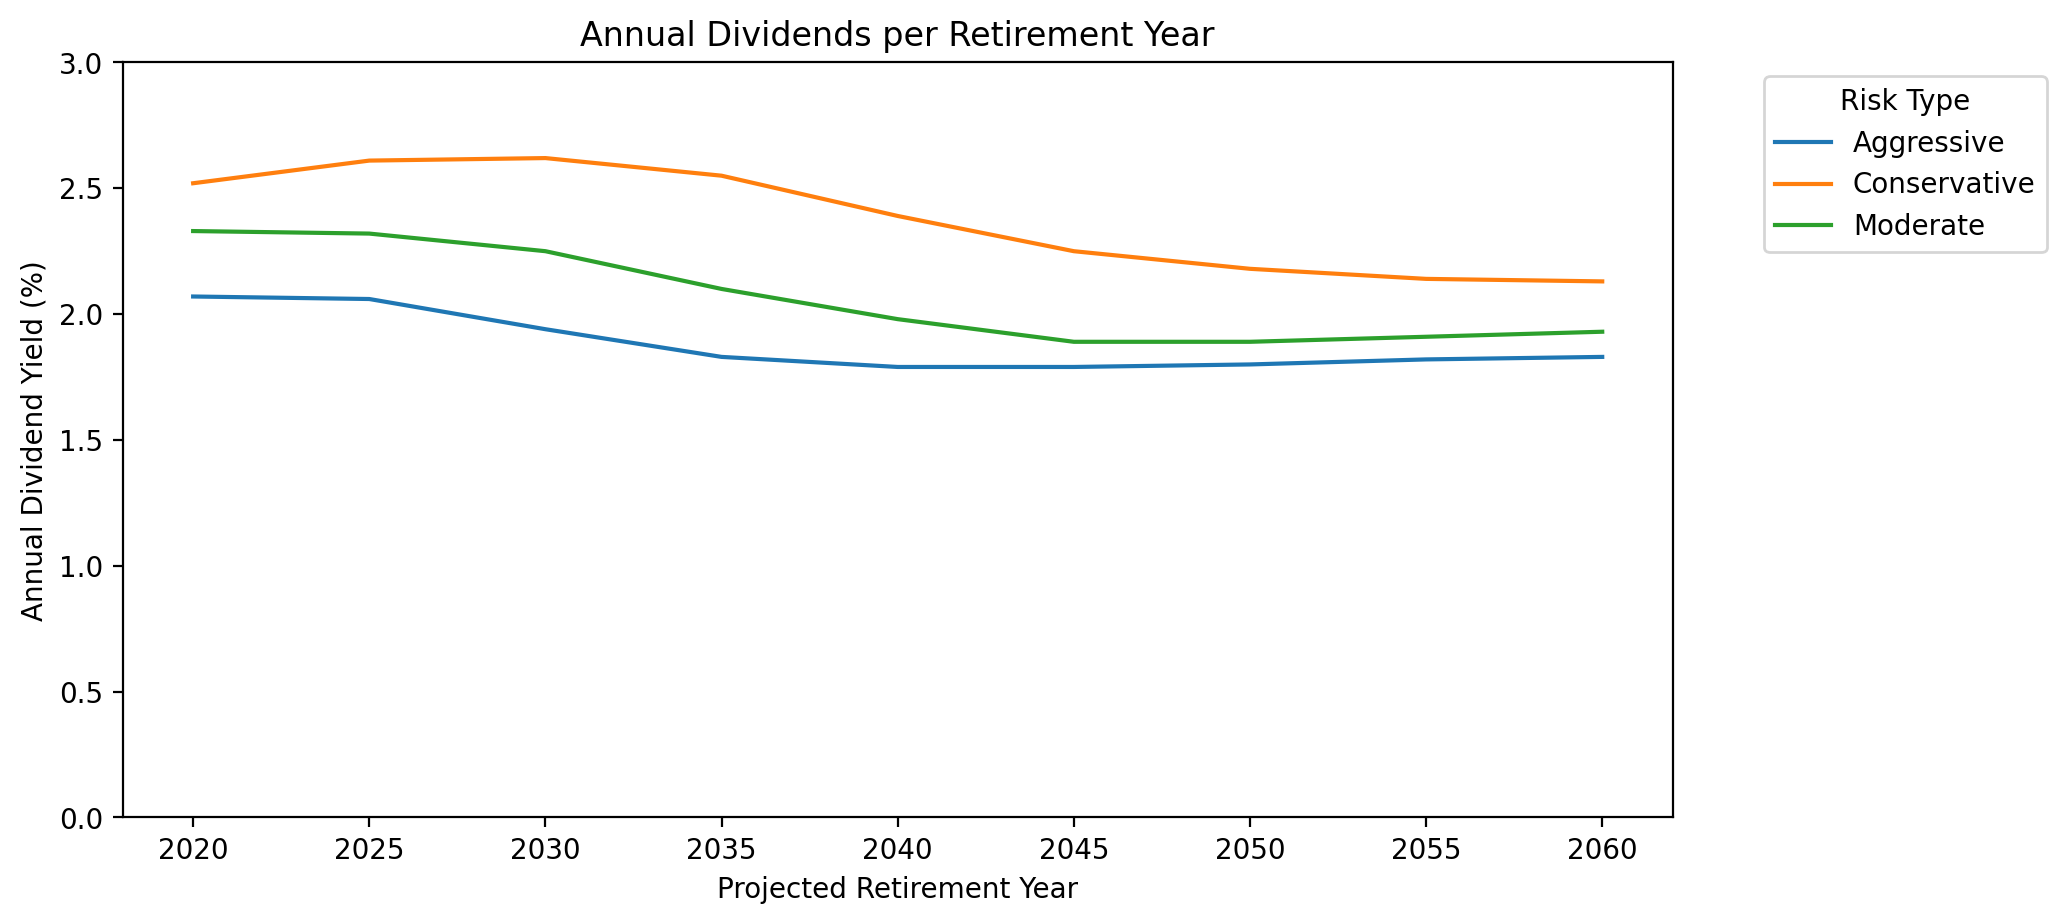

In [15]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('Annual Dividends per Retirement Year')
sns.lineplot(data=raw, x='Retire_Year', y='Dividend_Yield', hue='Risk_Type');
plt.xlabel('Projected Retirement Year')
plt.ylabel('Annual Dividend Yield (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0.0,3.0);

In [16]:
# Which pie can expect the highest Annual Dividend Yield?
raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nlargest(n=1, columns='Dividend_Yield')

,Retire_Year,Risk_Type,Dividend_Yield
7,2030,Conservative,2.62


In [17]:
# Which pie can expect the lowest Annual Dividend Yield?
raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nsmallest(n=1, columns='Dividend_Yield')

,Retire_Year,Risk_Type,Dividend_Yield
12,2040,Aggressive,1.79


<b>4.1.2 Trend Summary of Annual Dividend Yield (%)</b>

<ol>
    <li>Across all projected retirement years, Conservative Pies can expect the highest Annual Dividend Yield (ADY%), followed by Moderate Pies, and finally Aggressive Pies.</li>
    <li>Expected ADY% is seen to either increase or plateau until ~ 2030, after which it decreases until ~2045, before either plateauing again or slightly increasing.</li>
    <li>Per-year fluctuations in ADY% appear to become more pronounced as Risk Type becomes more Conservative. The Conservative trend line appears more S-shaped as opposed to the more aggressive portfolios that feature less drastic peaks and dips over time.</li>
    <li>Judging by the slopes of each trend line, it appears that the expected ADY% converges (or approaches it) some time after 2060.</li>
    <li>Variations in ADY% between pies of the same projected retirement year (but different Risk Types) seem to be most pronounced within 10-20 years of present date while differences become almost negligible 40+ years into the future.</li>
</ol>

### 4.2 Historic 1 year returns (%)

<b>4.2.1 Visualizing trends in Historic 1 year returns (%) in relation to projected Retirement Year and Risk Type</b>

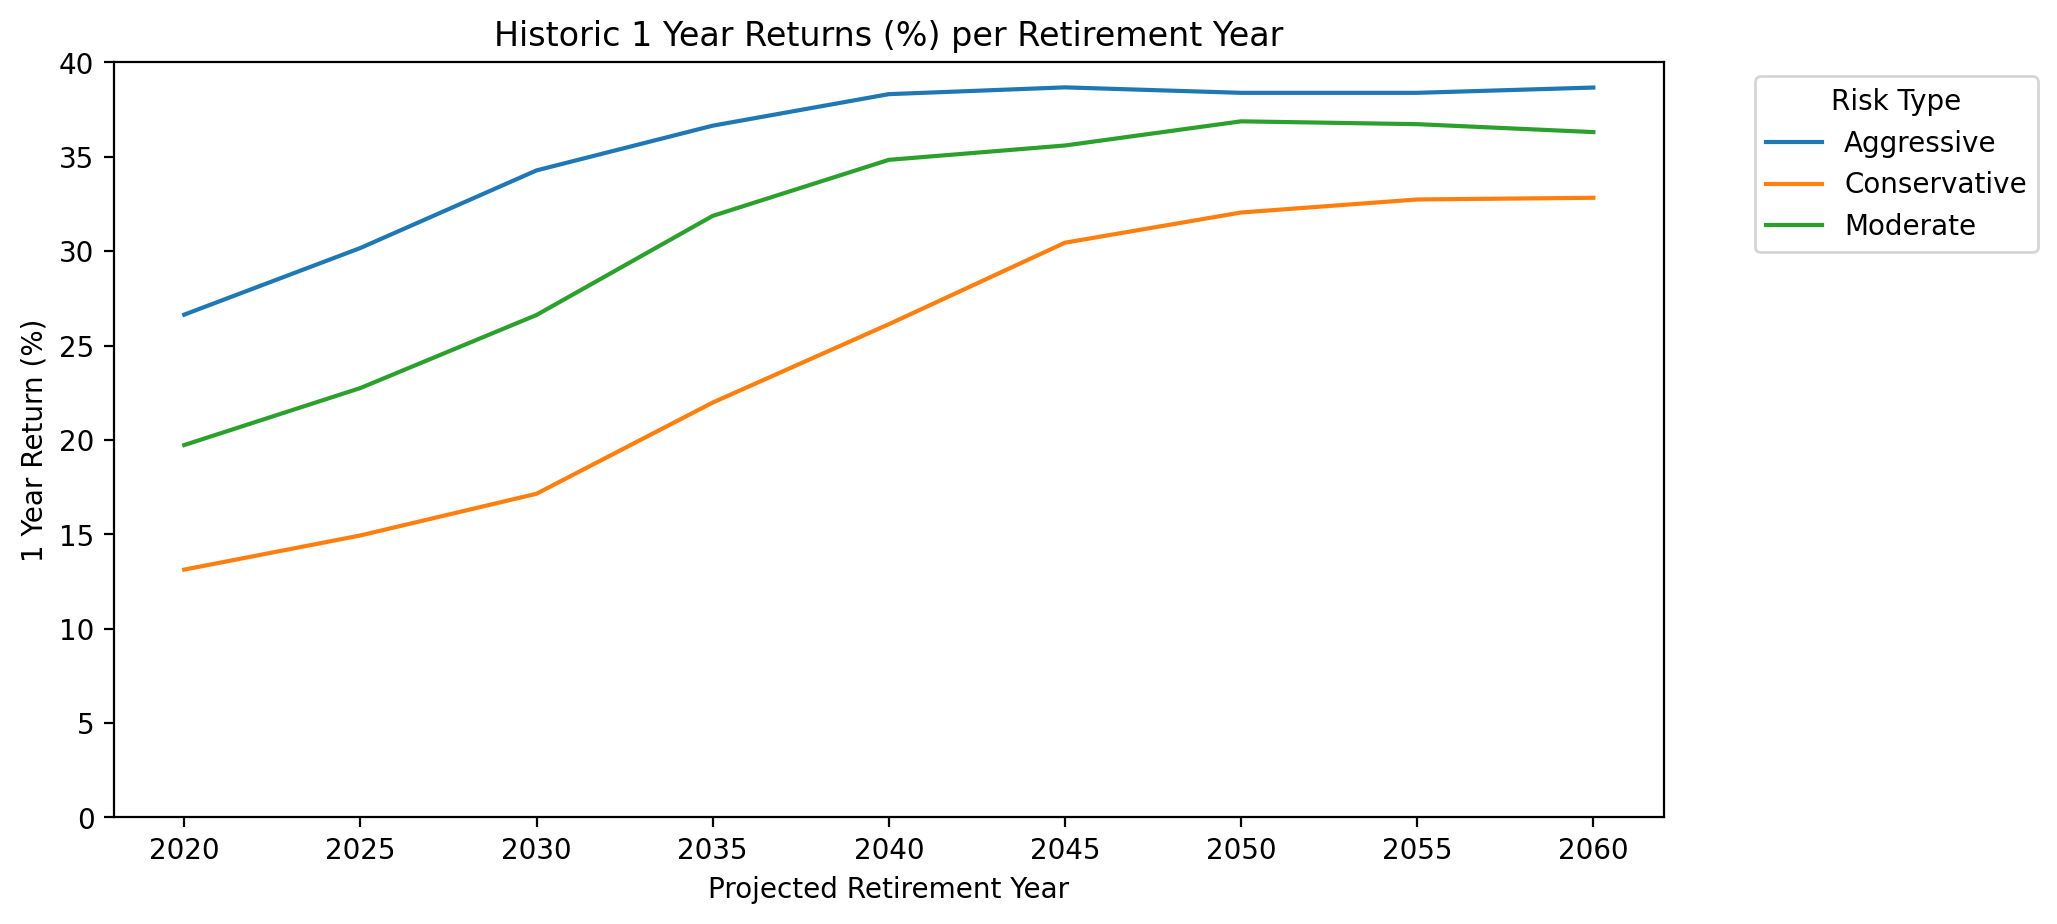

In [18]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 1 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_1Y', hue='Risk_Type');
plt.xlabel('Projected Retirement Year')
plt.ylabel('1 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,40);

In [19]:
# Which pie has the largest 1-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nlargest(n=1, columns="Return_1Y")

,Retire_Year,Risk_Type,Return_1Y
15,2045,Aggressive,38.68


In [20]:
# Which pie has the largest 1-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nsmallest(n=1, columns="Return_1Y")

,Retire_Year,Risk_Type,Return_1Y
1,2020,Conservative,13.13


<b>4.2.2 Trend Summary of Historic 1-Year Return (%)</b>

<ol>
    <li>Within the same projected retirement year, Aggressive Pies can consistently observe the highest historic 1-Year Return (%), followed by Moderate and then Conservative Pies.</li>
    <li>All trend lines for 1-Year Return increases as projected retirement year increases.</li>
    <li>Small increases in 1Y Return can be seen from 2020-2030, followed by a much more pronounced increase until 2040-2045, and finally tapering off into plateau into 2060.</li>
    <li>The largest disparity between 1Y Return of pies of the same retirement year can be seen early on with that disparity decreasing as time goes on.</li>
    <li>Conservative Pies can expect the largest per-year variation in 1Y Return followed by Moderate and finally Aggressive Pies (with the smallest relative per-year variation).</li>
</ol>

### 4.3 Historic 3 year returns (%)

<b>4.3.1 Visualizing trends in Historic 3 year returns (%) in relation to projected Retirement Year and Risk Type</b>

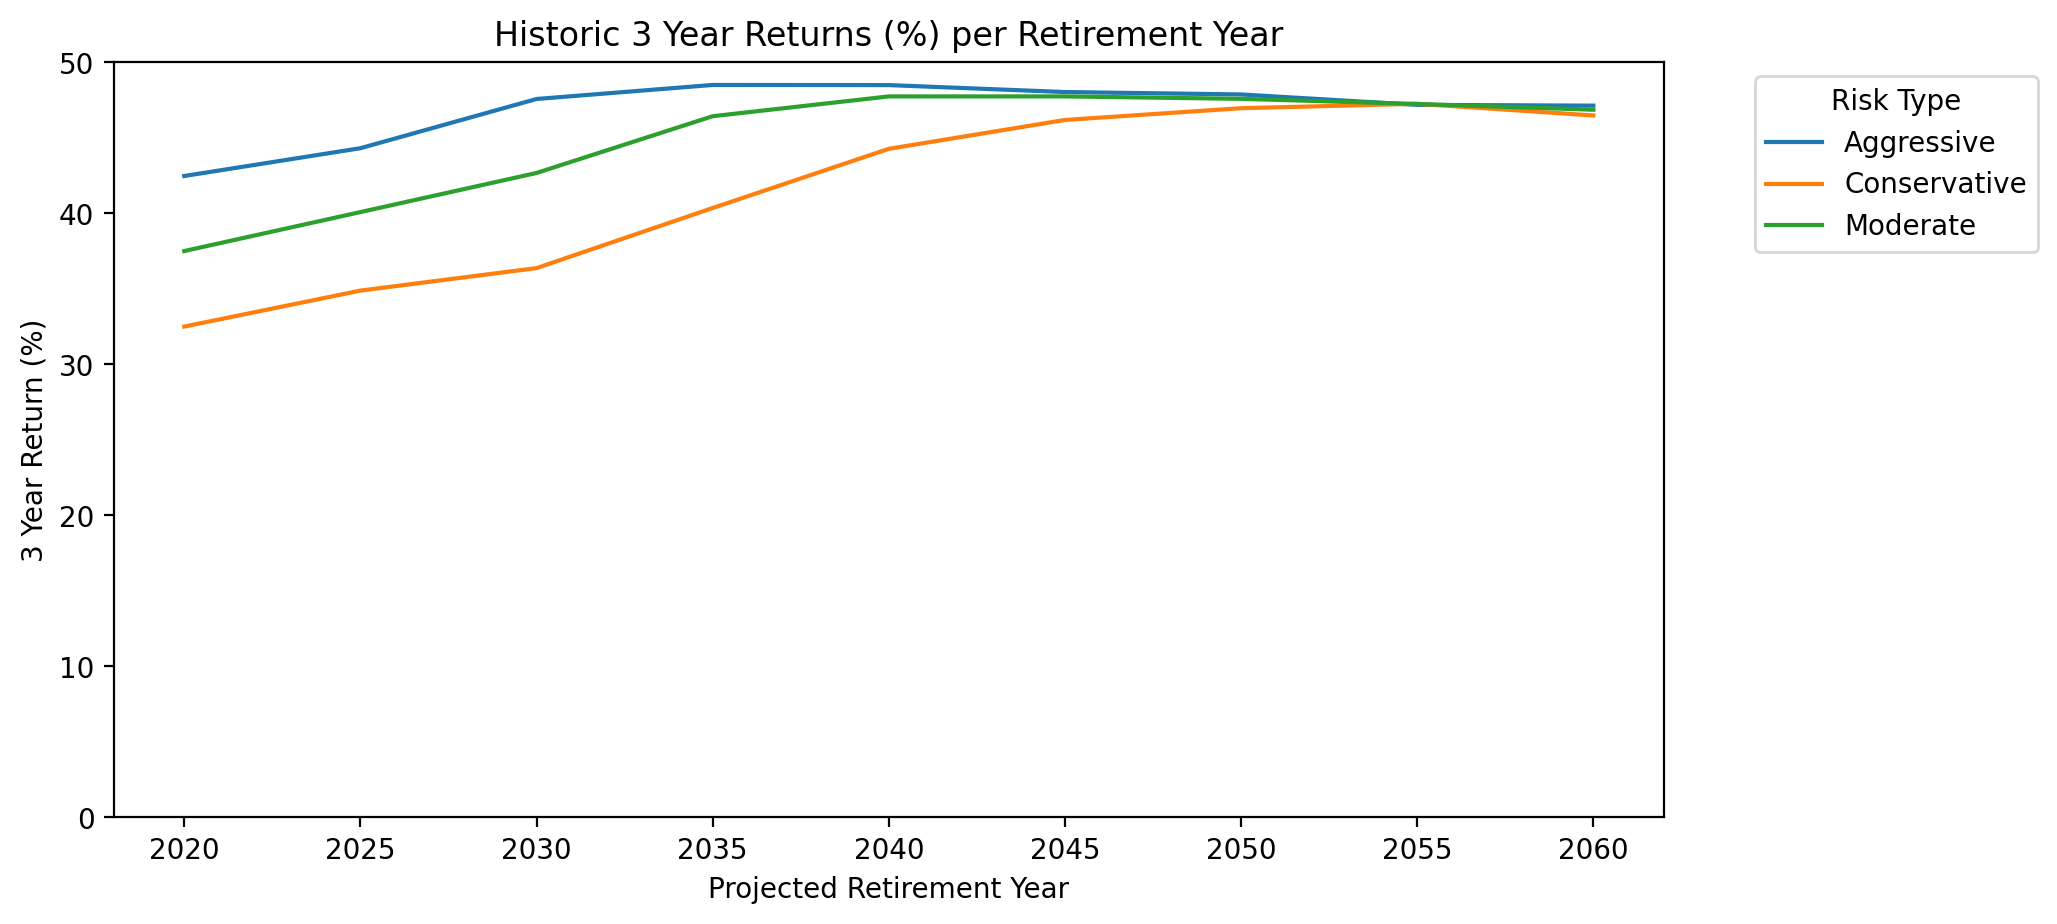

In [21]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 3 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year',  y='Return_3Y', hue='Risk_Type');
plt.xlabel('Projected Retirement Year')
plt.ylabel('3 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,50);

In [22]:
# Which pie has the largest 3-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nlargest(n=1, columns="Return_3Y")

,Retire_Year,Risk_Type,Return_3Y
9,2035,Aggressive,48.51


In [23]:
# Which pie has the smallest 3-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nsmallest(n=1, columns="Return_3Y")

,Retire_Year,Risk_Type,Return_3Y
1,2020,Conservative,32.51


<b>4.3.2 Trend Summary of Historic 3-Year Return (%)</b>

<ol>
    <li>Before 2050, Aggressive Pies observe the highest 3Y Return, followed (closely) by Moderate and then Conservative Pies.</li>
    <li>At 2055, all trend lines converge and differences in 3Y Return appear negligible.</li>
    <li>All trend lines increase from 2020-2040, after which the Conservative trend line continues to increase until 2050 (other trend lines either plateau or observe very slight decreases). After 2050, the three trend lines can be said to converge and then plateau.</li>
</ol>

### 4.4 Historic 5 year returns (%)

<b>4.4.1 Visualizing trends in Historic 5 year returns (%) in relation to projected Retirement Year and Risk Type</b>

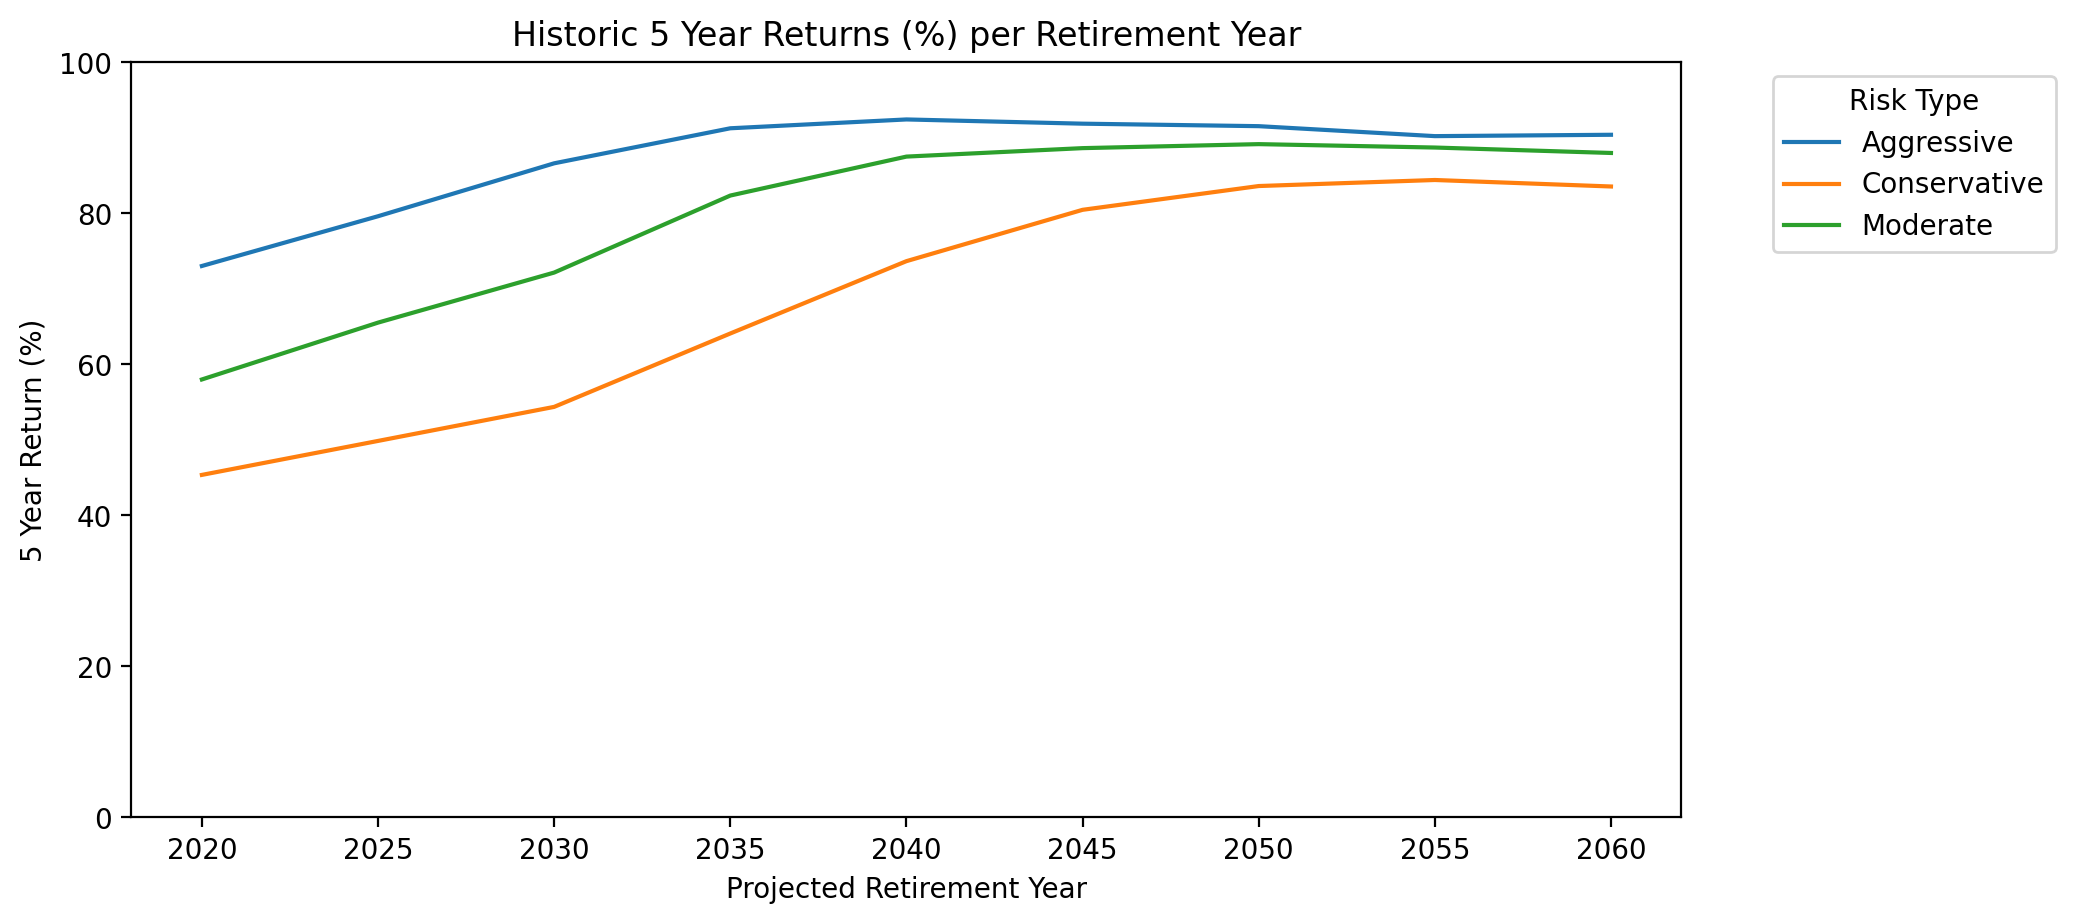

In [24]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 5 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_5Y', hue='Risk_Type');
plt.xlabel('Projected Retirement Year')
plt.ylabel('5 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,100);

In [25]:
# Which pie has the largest 5-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nlargest(n=1, columns="Return_5Y")

,Retire_Year,Risk_Type,Return_5Y
12,2040,Aggressive,92.45


In [26]:
# Which pie has the smallest 5-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nsmallest(n=1, columns="Return_5Y")

,Retire_Year,Risk_Type,Return_5Y
1,2020,Conservative,45.37


<b>4.4.2 Trend Summary of Historic 5-Year Return (%)</b>

<ol>
    <li>Within the same projected retirement year, Aggressive pies consistently observe higher 5-year returns followed by Moderate, and then Conservative Pies.</li>
    <li>All trend lines can be seen to increase until 2040, then either plateau or keep increasing (Conservative Pies) until 2050, before all relatively plateauing into 2060.</li>
    <li>The largest disparity within same retirement year can be seen early on but that disparity decreases as retirement year increases.</li>
</ol>

### 4.5 Percentage Allocated per Overall Security Type

<b>4.5.1 Creating columns for percentage allocation of each type of security</b>

In [27]:
raw['Total_Cash'] = raw['BIL']
raw['Total_Bonds'] = raw['BIV'] + raw['BLV'] + raw['BNDX'] + raw['BSV'] + raw['TIP']
raw['Total_Blend'] = raw['DBC']
raw['Total_Stocks'] = raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VEA'] + raw['VNQ'] + raw['VO'] + raw['VOE'] + raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG'] + raw['VWO']

<b>4.5.2 Creating views of the data for each Risk Type</b>

In [28]:
#Changed from .copy() during geographical visualization
all_aggressive = raw[raw['Risk_Type']=='Aggressive']
all_moderate = raw[raw['Risk_Type']=='Moderate']
all_conservative = raw[raw['Risk_Type']=='Conservative']

<b>4.5.3 Visualizing percentage allocation of Security Types (Aggressive Pies)</b>

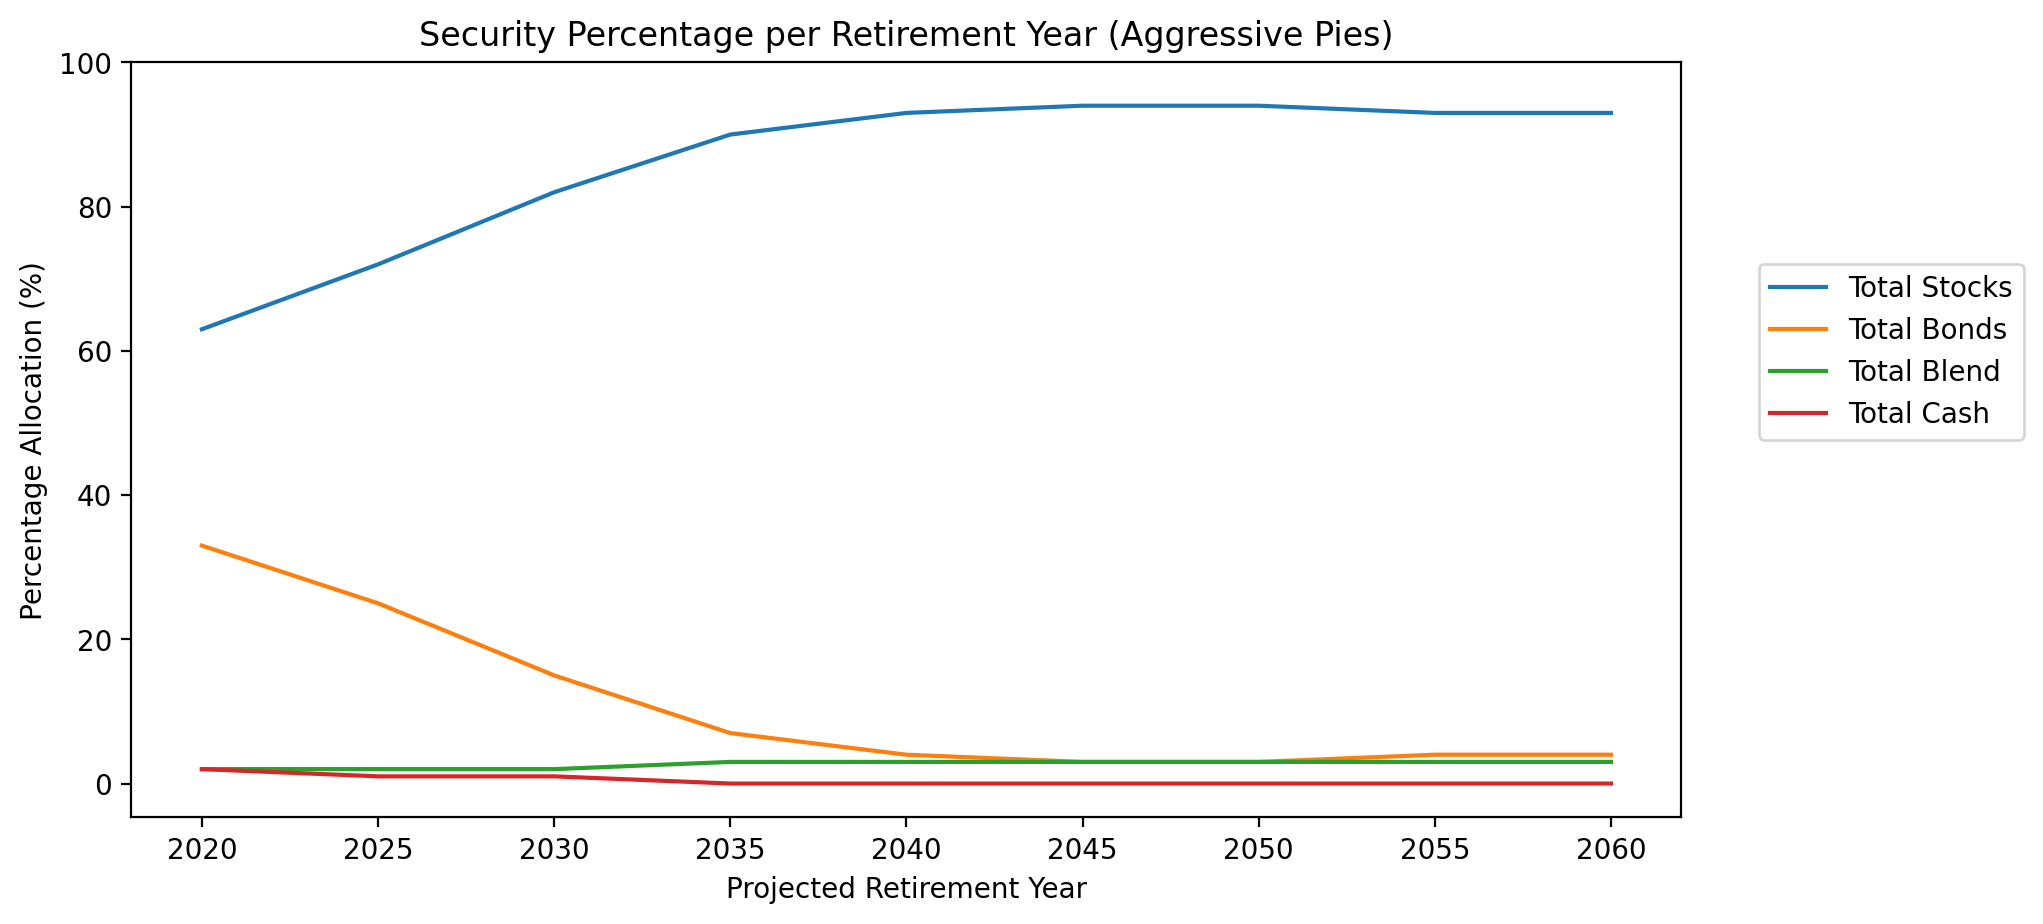

In [29]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Aggressive Pies)")
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<b>4.5.4 Trend Summary of % allocation per Security Type (Aggressive Pies)</b>

<ol>
    <li>Generally, the percentage allocation of Stocks can be seen to increase as projected retirement year increases, while allocation into Bonds decreases. Allocation into Cash remains relatively negligible throughout, while allocation into Blend securities (combination of different security types) increases very slightly before plateauing.</li>
    <li>At and after 2050, all trend lines appear to plateau, indicating no drastic changes to pie composition from that point onwards (regarding percentage allocation into various security types).</li>
    <li>An anamoly of Stock allocation dropping between 2035-2040 appears quite odd but this may be explained by the composition of Blend not retaining a consistent ratio of the various security types.</li>
</ol>

<b>4.5.5 Visualizing percentage allocation of Security Types (Moderate Pies)</b>

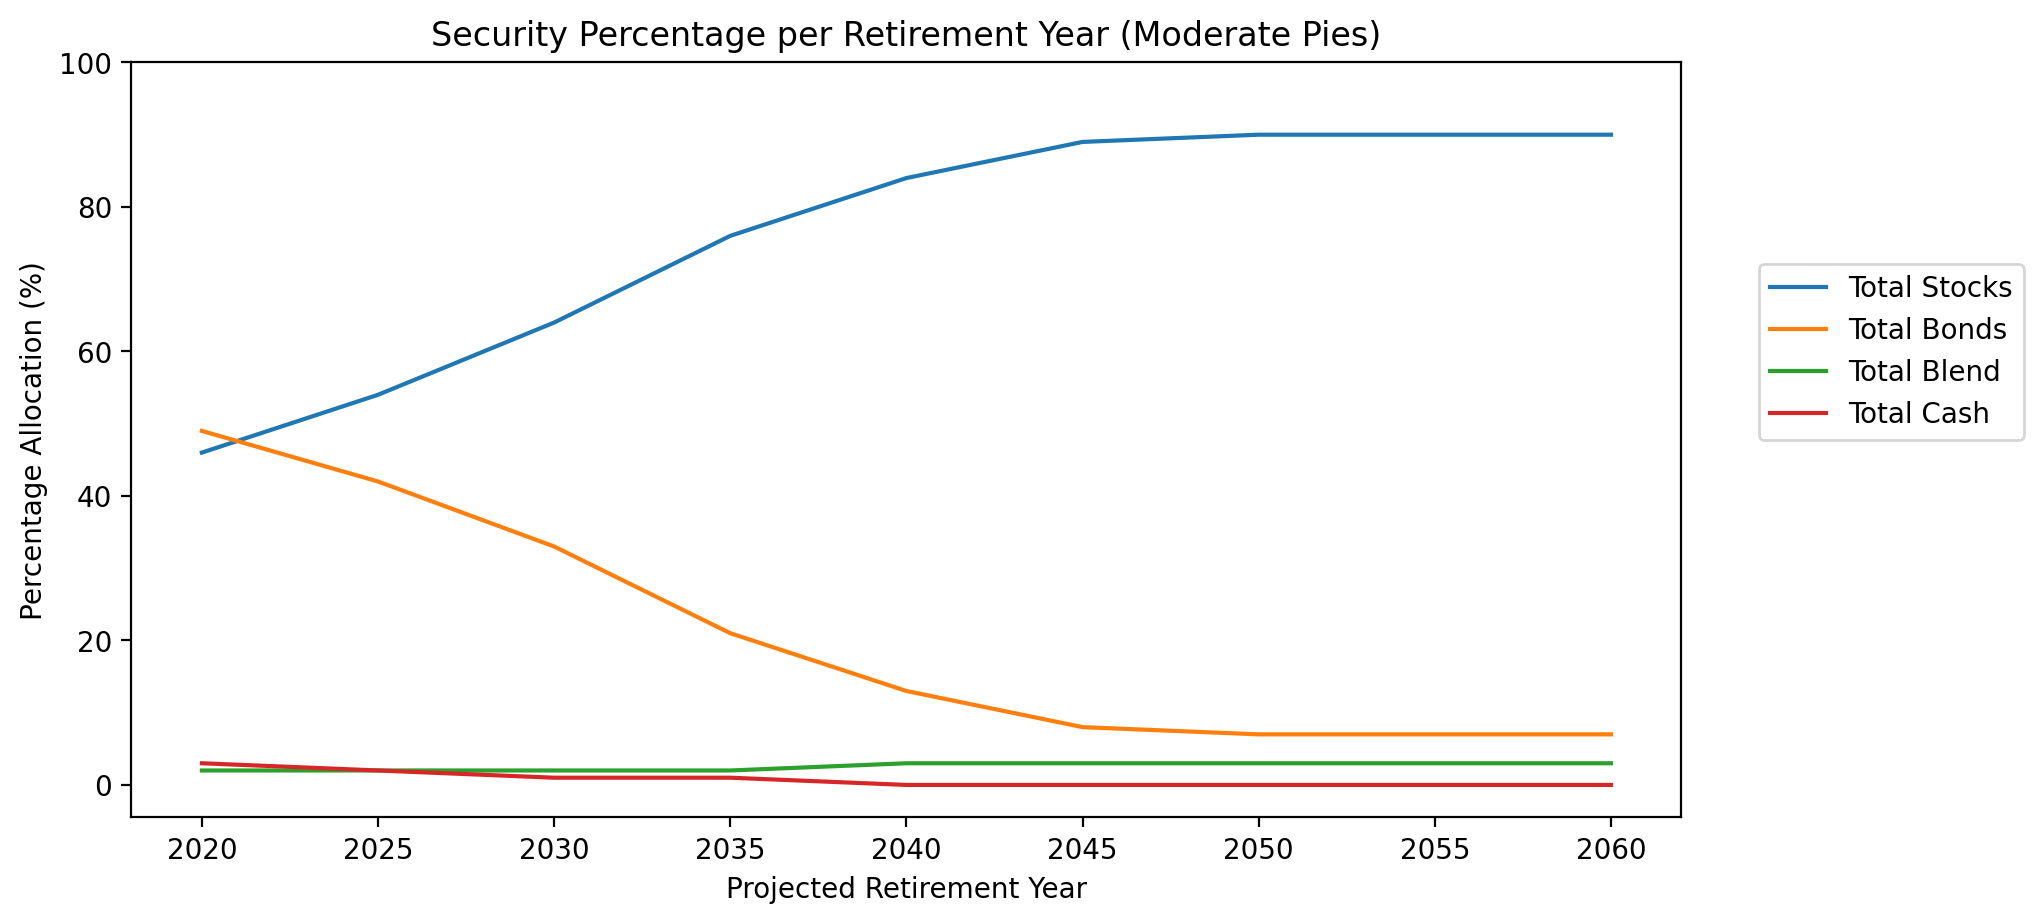

In [30]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Moderate Pies)")
sns.lineplot(data=all_moderate[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<b>4.5.6 Trend Summary of % allocation per Security Type (Moderate Pies)</b>

<ol>
    <li>As the projected retirement year increases, percentage allocation into Stocks steadily increase as the allocation into Bonds decrease. Allocation into Cash and Blend Security Types remain relatively low (below 5%). </li>
    <li>The increase in Stock allocation and decrease in Bond allocation can be seen from 2020-2045, after which all percentage allocations appear to plateau and remain relatively constant.</li>
    <li>After 2025, the percentage allocation into Stocks remain above 50% of the total 'pie'.</li>
<ol>

<b>4.5.7 Visualizing percentage allocation of Security Types (Conservative Pies)</b>

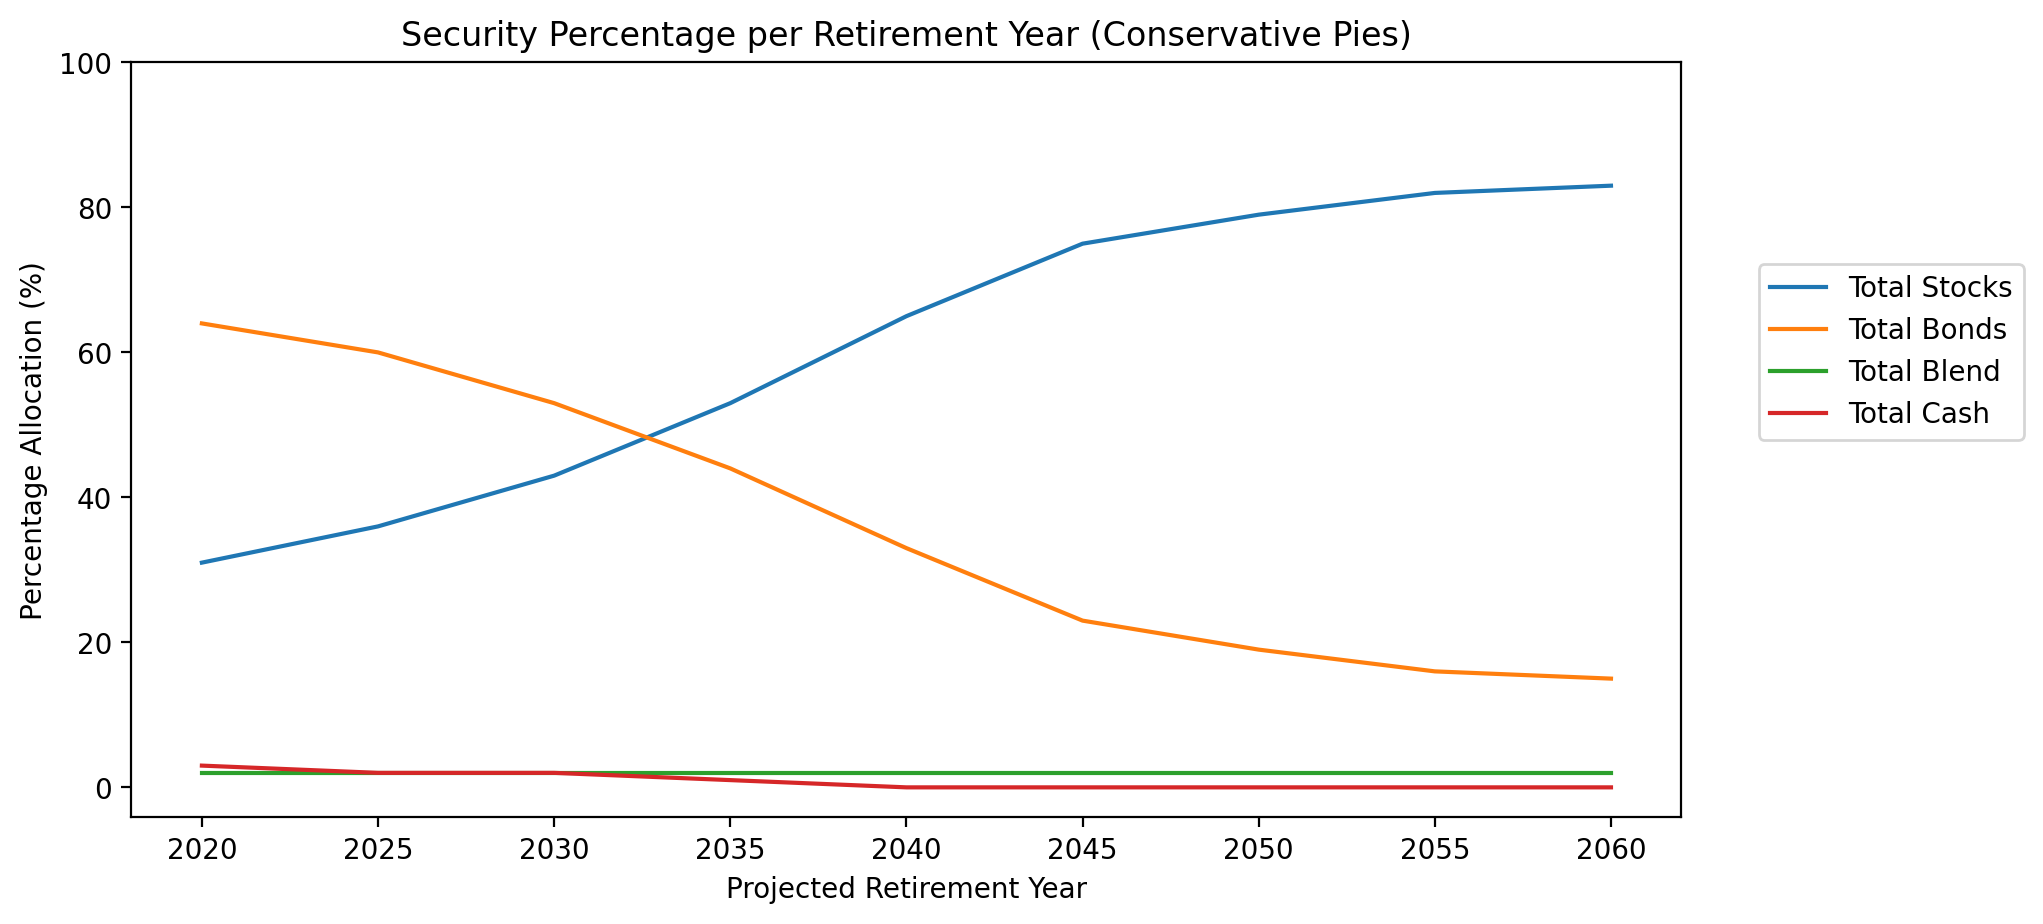

In [31]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Conservative Pies)")
sns.lineplot(data=all_conservative[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<b>4.5.8 Trend Summary of % allocation per Security Type (Conservative Pies)</b>

<ol>
    <li>As projected retirement year increases, percentage allocation into Stocks increase while allocation into Bonds decrease.</li>
    <li>Starting from 2020, allocation into Stocks is lower than Bonds. The two trend lines converge between 2030 and 2035 after which the disparity between the two becomes larger as retirement year increaases.</li>
    <li>Percentage allocation into Cash remains relatively negligible (less than 5%) and becomes 0% after 2040.</li>
</ol>

### 4.6 Percentage Allocated per Individual Security

<b>4.6.1 Visualizing percentage allocation of individual securities (Aggressive Pies)</b>

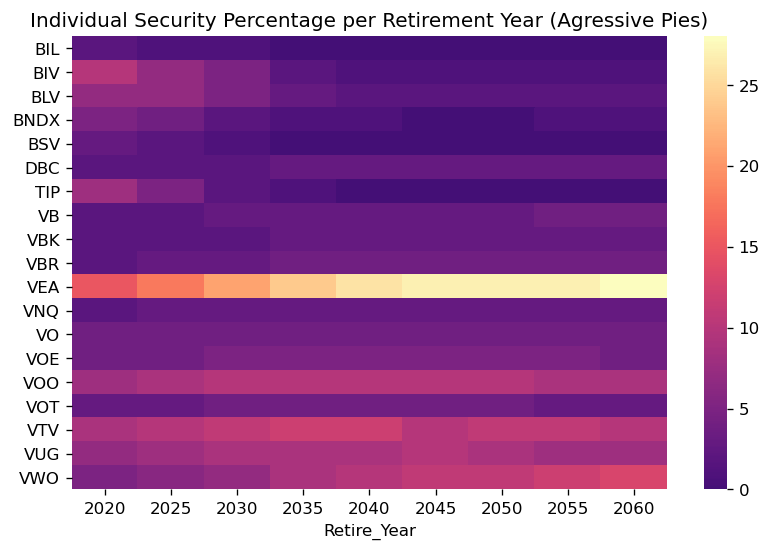

In [32]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Agressive Pies)')
sns.heatmap(data=all_aggressive[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<b>4.6.2 Trend Summary of % allocation per Individual Security (Aggressive Pies)</b>

In [33]:
# Summary goes here

<b>4.6.3 Visualizing percentage allocation of individual securities (Moderate Pies)</b>

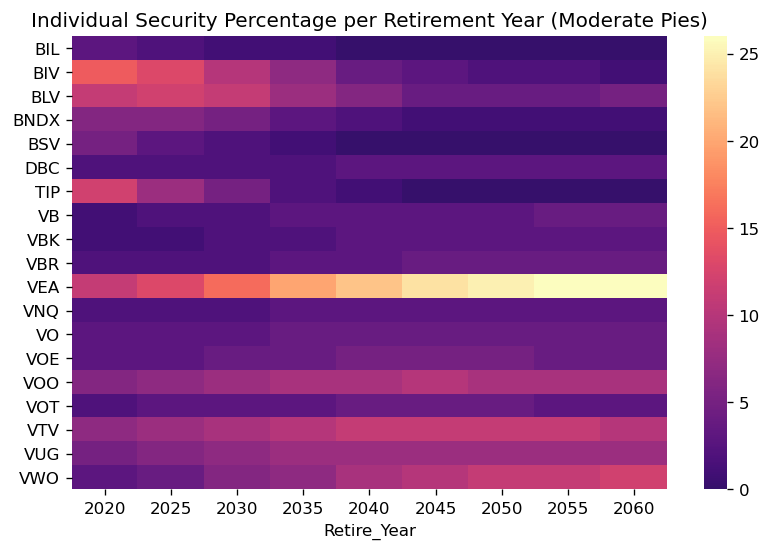

In [34]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Moderate Pies)')
sns.heatmap(data=all_moderate[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<b>4.6.4 Trend Summary of % allocation per Individual Security (Moderate Pies)</b>

In [35]:
# Summary goes here

<b>4.6.5 Visualizing percentage allocation of individual securities (Conservative Pies)</b>

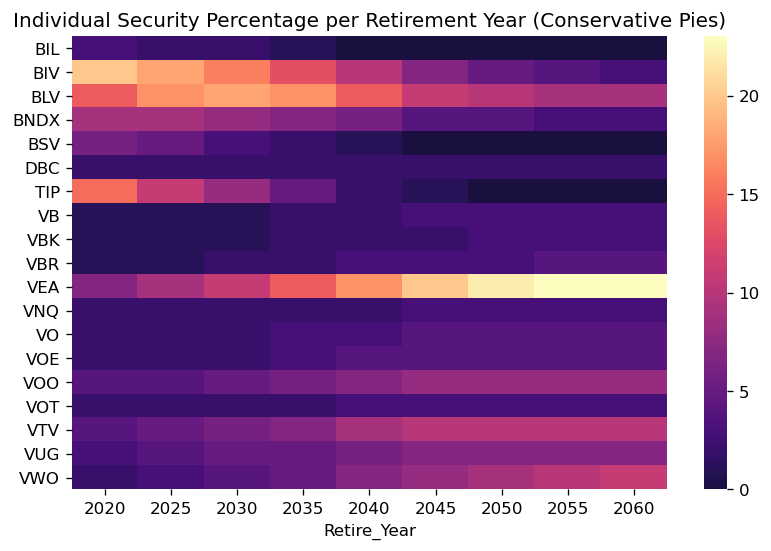

In [36]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Conservative Pies)')
sns.heatmap(data=all_conservative[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<b>4.6.6 Trend Summary of % allocation per Individual Security (Conservative Pies)</b>

In [37]:
# Summary goes here

### 4.7 Geographical Concentrations of Securities

<b>4.7.1 Creating views of the data for primary Geographical Concentration of securities</b>

In [38]:
raw['US_Conc'] = raw['BIV'] + raw['BLV'] + raw['BSV'] + raw['TIP'] + raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VNQ'] + raw['VO'] + raw['VOE'] +raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG']
raw['Intl_Conc']= raw['BNDX'] + raw['VEA'] + raw['VWO']
raw['Mixed_Conc'] = raw['DBC']
raw['Nongeo_Conc'] = raw['BIL']

<b>4.7.2 Visualizing the Percentage Allocation of each Geographical Concentration</b>

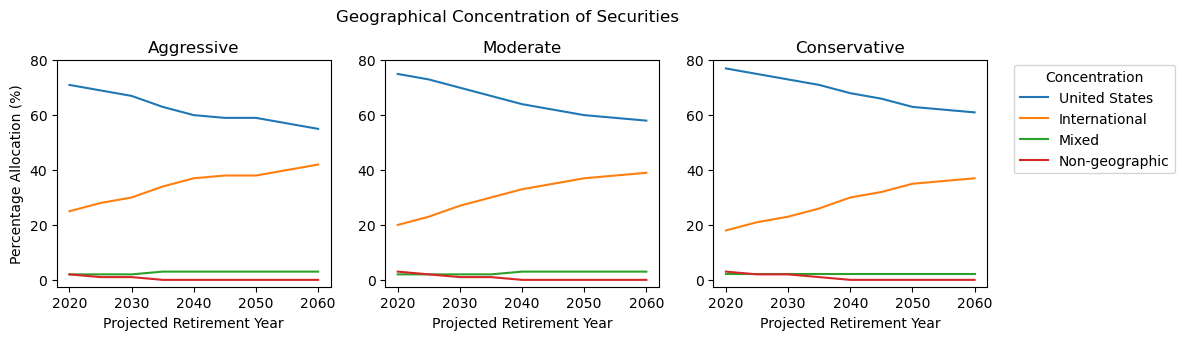

In [39]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Geographical Concentration of Securities', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_ylim(-2.5,80)
ax[0].set_xlabel("Projected Retirement Year")
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='US_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Intl_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mixed_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Nongeo_Conc', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(" ")
ax[1].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='US_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Intl_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mixed_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Nongeo_Conc', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(" ")
ax[2].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='US_Conc', ax=ax[2], label='United States')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Intl_Conc', ax=ax[2], label='International')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mixed_Conc', ax=ax[2], label='Mixed')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Nongeo_Conc', ax=ax[2], label='Non-geographic')
ax[2].legend(title='Concentration', loc=(1.1,0.5))

plt.show()

<b>4.7.3 Trend Summary of % allocation per Geographical Concentration (Conservative Pies)</b>

In [40]:
# Summary goes here

### 4.8 General Cap Preference (Small / Mid / Large)

<b>4.8.1 Creating views of the data for each cap size</b>

In [41]:
raw['Small_Cap'] = raw['VB'] + raw['VBK'] + raw['VBR']
raw['Mid_Cap'] = raw['VO'] + raw['VOE'] + raw['VOT']
#No large cap ETFs in the M1 Expert Pies

<b>4.8.2 Visualizing the Percentage Allocation of each Cap Size</b>

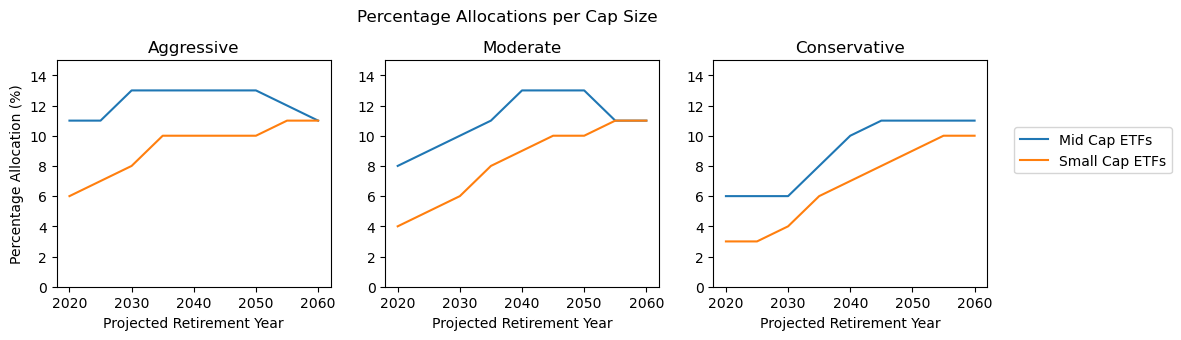

In [42]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations per Cap Size', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Projected Retirement Year")
ax[0].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mid_Cap', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Small_Cap', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mid_Cap', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Small_Cap', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mid_Cap', ax=ax[2], label='Mid Cap ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Small_Cap', ax=ax[2], label='Small Cap ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<b>4.8.3 Trend Summary of % allocation per Cap Size</b>

In [43]:
# Summary goes here

### 4.9 Preference of Value vs. Growth ETFs

<b>4.9.1 reating views of the data for Value and Growth ETFs</b>

In [44]:
raw['Growth'] = raw['VBK'] + raw['VOT'] + raw['VUG']
raw['Value'] = raw['VBR'] + raw['VOE'] + raw['VTV']

<b>4.9.2 Visualizing the Percentage Allocations of Value vs. Growth ETFs</b>

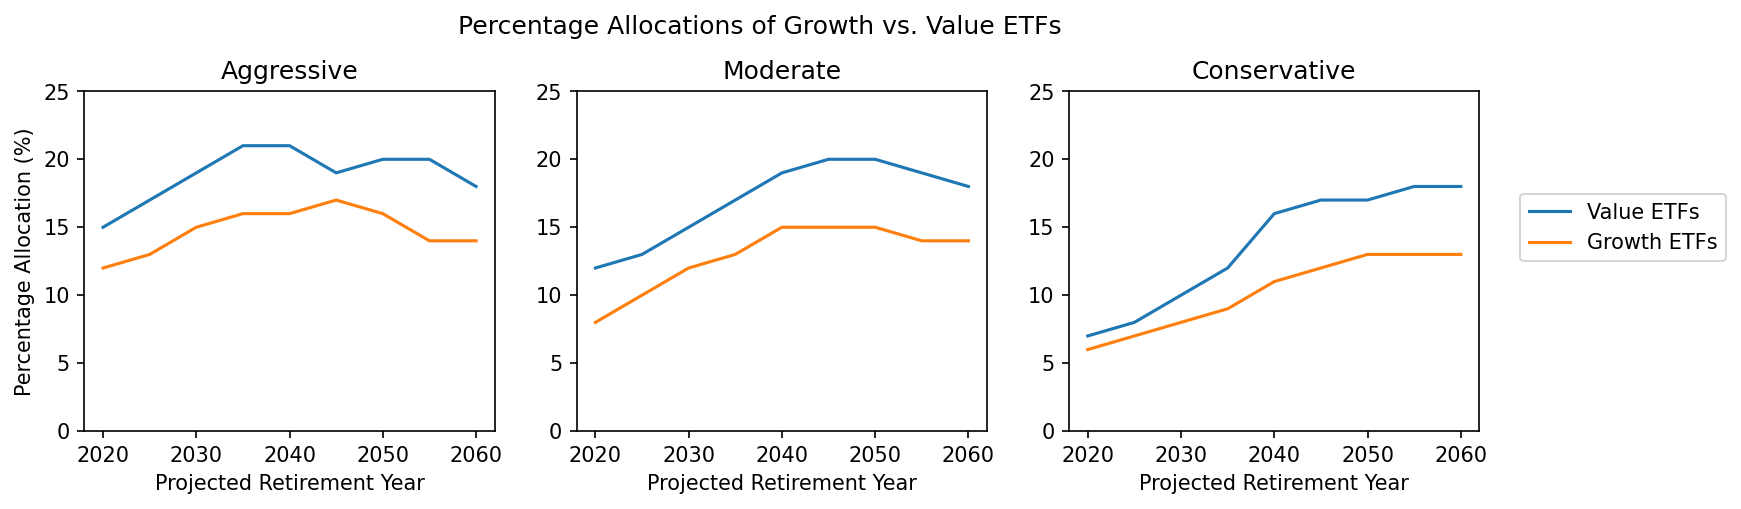

In [45]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=150)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations of Growth vs. Value ETFs', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Projected Retirement Year")
ax[0].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Value', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Growth', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Value', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Growth', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Value', ax=ax[2], label='Value ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Growth', ax=ax[2], label='Growth ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<b>4.9.3 Trend Summary of % allocation for Value vs. Growth ETFs</b>

In [ ]:
# Summary goes here